# ****WELCOME IN FACE MASK DETECTION USING DEEP LEARNING IN THIS PROJECT WE FIND OUT PERSON IS WEARING MASK OR NOT****

# ***First We Import Dataset Using Kaggle API***

In [ ]:
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! kaggle datasets download -d belsonraja/face-mask-dataset-with-and-without-mask

 94% 129M/137M [00:02<00:00, 58.6MB/s]
100% 137M/137M [00:02<00:00, 62.0MB/s]


#  ***Extract ZipFile Of Face Mask Detection Dataset using This Code****

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/face-mask-dataset-with-and-without-mask.zip")
zip_ref.extractall("/content")
zip_ref.close()

# ***Import Required Libraries Of Machine Learning And Deep Learning****

In [ ]:
import os
import cv2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam,Adagrad,rmsprop

# ****PLOT SOME IMAGE OF PERSON WITH MASK OR WITHOUT MASK****


# ***With Mask Plot OpenCV***

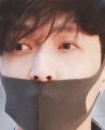

In [ ]:
from google.colab.patches import cv2_imshow
img = cv2.imread("/content/facemask-dataset/dataset/with_mask/with_mask (1005).jpg")
cv2_imshow(img)

# ****Without Mask Plot OpenCV****



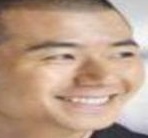

In [ ]:
img = cv2.imread("/content/facemask-dataset/dataset/without_mask/without_mask (10).jpg")
cv2_imshow(img)

# `****Import Train And Test Data Directory****

In [ ]:
train_data_dir = "/content/facemask-dataset/dataset"
test_data_dir = "/content/facemask-dataset/dataset"

# ****Generating The Image Using Image Data Generator****

In [ ]:
datagen = ImageDataGenerator(
    validation_split=0.40,
    rescale = 1./255
)

# ***Dividing The DataGenerator in Train and Validation DataGenerator***

In [ ]:
train_generator = datagen.flow_from_directory(
    train_data_dir,
    color_mode= "grayscale",
    target_size=(48,48),
    batch_size = 32,
    class_mode = "categorical",
    subset = 'training'
)

validation_generator = datagen.flow_from_directory(
    test_data_dir,
    color_mode= "grayscale",
    target_size=(48,48),
    batch_size = 32,
    class_mode = "categorical",
    subset = 'validation'
)

Found 2300 images belonging to 2 classes.
Found 1533 images belonging to 2 classes.


# ***Creating The Class Label***

In [ ]:
class_label = ['with_mask','without_mask']

In [ ]:
len(class_label)

2

#***Created Image Matrix for Trainng Model***

In [ ]:
img,label = train_generator.__next__()

# ***Images In Matrix Form***

In [ ]:
print(img)

[[[[0.21176472]
   [0.22352943]
   [0.227451  ]
   ...
   [0.16078432]
   [0.13725491]
   [0.12941177]]

  [[0.20000002]
   [0.24313727]
   [0.21176472]
   ...
   [0.15686275]
   [0.13333334]
   [0.14117648]]

  [[0.19215688]
   [0.18431373]
   [0.18431373]
   ...
   [0.12941177]
   [0.1254902 ]
   [0.1137255 ]]

  ...

  [[0.18039216]
   [0.16078432]
   [0.14901961]
   ...
   [0.5176471 ]
   [0.56078434]
   [0.54509807]]

  [[0.17254902]
   [0.16862746]
   [0.16078432]
   ...
   [0.5176471 ]
   [0.5254902 ]
   [0.23137257]]

  [[0.15686275]
   [0.14901961]
   [0.16078432]
   ...
   [0.49803925]
   [0.21960786]
   [0.227451  ]]]


 [[[0.18039216]
   [0.1764706 ]
   [0.18823531]
   ...
   [0.18039216]
   [0.2509804 ]
   [0.47058827]]

  [[0.1764706 ]
   [0.16862746]
   [0.1764706 ]
   ...
   [0.16470589]
   [0.1764706 ]
   [0.3372549 ]]

  [[0.1764706 ]
   [0.16862746]
   [0.17254902]
   ...
   [0.16862746]
   [0.14509805]
   [0.23137257]]

  ...

  [[0.11764707]
   [0.09803922]
   [0.1

# ***Creating Model For Model Training For Face Mask Detection***

In [ ]:
# Create a cnn model


model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(48,48,1)))

model.add(Conv2D(64,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(128,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(256,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(512,activation='relu'))

model.add(Dense(2,activation="softmax"))

# ***Summary Of Model***

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 22, 22, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                  

# ***Compilation Of Model For Increasing Accuracy Using Adam Optimizer and Decreasing Loss Using Categorical Cross Entropy***

In [ ]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

# ***Diving Image In Train And Test For Num Of Epochs***

In [ ]:
train_path = "/content/facemask-dataset/dataset"
test_path = "/content/facemask-dataset/dataset"

In [ ]:
num_train_imgs = 0

for root,dirs,files in os.walk(train_path):
  num_train_imgs+=len(files)
  num_test_imgs = 0

for root,dirs,files in os.walk(test_path):
  num_test_imgs+=len(files)

In [ ]:
print(num_train_imgs)

3833


In [ ]:
print(num_test_imgs)

3833


# ***Fit Our Model For Model Training And Run Epochs And Increase Accuracy And Decrease Losses***

In [ ]:
history=model.fit(train_generator,steps_per_epoch=15,epochs=10
                  ,validation_data=validation_generator)

Epoch 1/10
15/15 [==============================] - 23s 1s/step - loss: 0.3810 - accuracy: 0.8250 - val_loss: 0.4687 - val_accuracy: 0.7932
Epoch 2/10
15/15 [==============================] - 22s 2s/step - loss: 0.3778 - accuracy: 0.8193 - val_loss: 0.4273 - val_accuracy: 0.8023
Epoch 3/10
15/15 [==============================] - 30s 2s/step - loss: 0.2873 - accuracy: 0.8958 - val_loss: 0.4350 - val_accuracy: 0.8154
Epoch 4/10
15/15 [==============================] - 22s 1s/step - loss: 0.2912 - accuracy: 0.8729 - val_loss: 0.4091 - val_accuracy: 0.8245
Epoch 5/10
15/15 [==============================] - 29s 2s/step - loss: 0.2794 - accuracy: 0.8875 - val_loss: 0.4580 - val_accuracy: 0.8356
Epoch 6/10
15/15 [==============================] - 21s 1s/step - loss: 0.3147 - accuracy: 0.8750 - val_loss: 0.5035 - val_accuracy: 0.7619
Epoch 7/10
15/15 [==============================] - 29s 2s/step - loss: 0.2513 - accuracy: 0.9104 - val_loss: 0.3715 - val_accuracy: 0.8447
Epoch 8/10
15/15 [==

# ***Created The Accuracy Plot And Losses Plot Code Using Pandas DataFrame***

<Axes: >

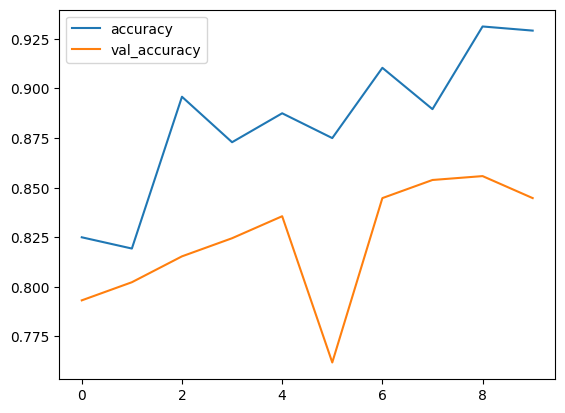

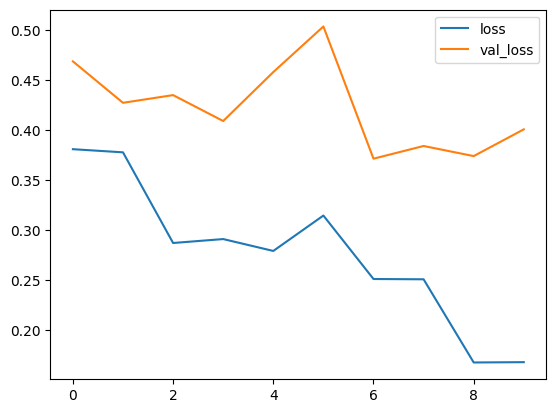

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:,['accuracy','val_accuracy']].plot()
history_df.loc[:,['loss','val_loss']].plot()

# ****Resized Our Images And Testing Our Images In Which We Find Out The Person Is Wearing Mask Or Not****

1/1 [==============================] - 0s 143ms/step
Person wearing a Mask ! You should Giving A permision To Enter In office
0


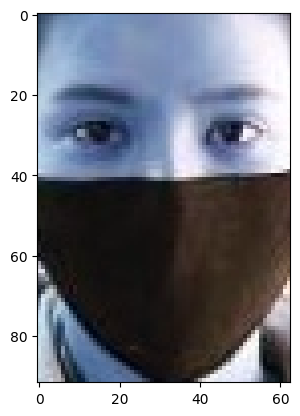

In [ ]:
frame = cv2.imread("/content/facemask-dataset/dataset/with_mask/with_mask (1001).jpg")

gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
labels_dict = {0:'with_mask',1:'without_mask'}
gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray,(48,48))
normalize = resized/255.0
reshaped = np.reshape(normalize,(1,48,48,1))
result = model.predict(reshaped)
label = np.argmax(result,axis=1)[0]

if (label==0):
  print("Person wearing a Mask ! You should Giving A permision To Enter In office")
elif (label==1):
  print("Person Not wearing a Mask ! You should Not  Giving A permision To Enter In office")

print(label)
plt.imshow(frame)

1/1 [==============================] - 0s 56ms/step
Person Not wearing a Mask ! You should Not  Giving A permision To Enter In office
1


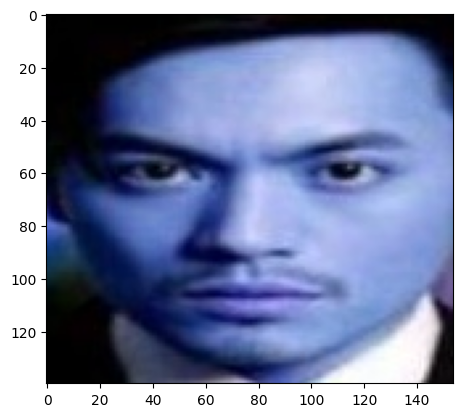

In [ ]:
frame = cv2.imread("/content/facemask-dataset/dataset/without_mask/without_mask (1010).jpg")

gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
labels_dict = {0:'with_mask',1:'without_mask'}
gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray,(48,48))
normalize = resized/255.0
reshaped = np.reshape(normalize,(1,48,48,1))
result = model.predict(reshaped)
label = np.argmax(result,axis=1)[0]

if (label==0):
  print("Person wearing a Mask ! You should Giving A permision To Enter In office")
elif (label==1):
  print("Person Not wearing a Mask ! You should Not  Giving A permision To Enter In office")

print(label)
plt.imshow(frame)